# Desafio Lighthouse INDICIUM

**É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.**

## Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma **análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido.** Lembre-se que há muito dinheiro envolvido, então ***a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada)***



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%pip install seaborn
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Entregas

1) Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

In [60]:
df = pd.read_csv('desafio_indicium_imdb.csv')

# Visualizando a base de dados
df.head(3)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


In [169]:
print('A base de dados tem', df.shape[0], 'linhas e', df.shape[1] , 'colunas.')

A base de dados tem 999 linhas e 16 colunas.


In [170]:
print('Tipo das colunas e a quantidade de valores não nulos em cada:')

df.info()

Tipo das colunas e a quantidade de valores não nulos em cada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)


Analisando as informações acima é possível observar que temos três colunas com valores nulos *(Certificate, Meta_score, Gross)* e a coluna *Gross* está classificada com o tipo errado de dado.

**Convertendo a coluna Gross para tipo numérico:**

In [70]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype(float)

**Lidando com valores ausentes (Certificate, Meta_score, Gross):**

In [19]:
df['Certificate'].value_counts()

U           335
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [20]:
df['Certificate'].fillna('U',inplace=True)

df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

**Explicação:** Para a coluna *Certificate*, primeiro verifiquei qual era o valor mais recorrente (moda) e utilizei esse valor para preencher os valores ausentes. Isso garante que os valores ausentes sejam substituídos por um valor comum e representativo da distribuição dos dados, já as colunas *Meta_score* e *Gross* preenchi os valores ausentes com a média dos valores existentes na coluna. A média fornece uma estimativa central que é representativa dos dados e pode ser utilizada para preencher valores ausentes.

In [174]:
print('Quantidade de valores duplicados na base:', df.duplicated().sum())

Quantidade de valores duplicados na base: 0


**Visualizando estatísticas descritivas das colunas numéricas base de dados:**

In [175]:
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,999.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,11.367570,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,72.000000,5.547150e+04
50%,500.000000,7.900000,77.969121,1.383560e+05
75%,749.500000,8.100000,85.500000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [75]:
#calculando as medias
media_avaliacao_imdb = df['IMDB_Rating'].mean()
media_avaliacao_meta = df['Meta_score'].mean()

#verificando qual o genero mais comum
genero_comum = df['Genre'].value_counts().idxmax()

print(f"Classificação média da IMDB: {media_avaliacao_imdb:.2f}")
print(f"Classificação média de Meta Score: {media_avaliacao_meta:.2f}")
print(f"Gênero mais comum: {genero_comum}")

Classificação média da IMDB: 7.95
Classificação média de Meta Score: 77.97
Gênero mais comum: Drama


**Visualizando a frequência de distribuição de avaliações do IMDB:**

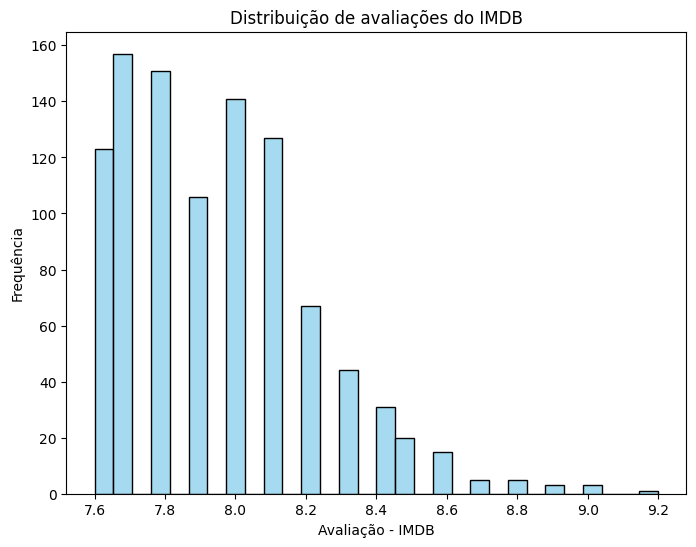

In [194]:
plt.figure(figsize=(8, 6))
sns.histplot(df['IMDB_Rating'], bins=30, color='skyblue')
plt.title('Distribuição de avaliações do IMDB')
plt.xlabel('Avaliação - IMDB')
plt.ylabel('Frequência')
plt.show()

**Análise:** A avaliação com maior frequência na base de dados é de 7.7 e a menor é de 9.2, a maioria das avaliações tende a se concentrar em uma faixa "boa", raramente as avaliações são extremamente altas, o que sugere que alcançar uma classificação quase perfeita é muito difícil e reservado para filmes que são amplamente considerados excepcionais.

**Código:** Para esse gráfico utilizei o histograma, que foi gerado a partir coluna IMDB_Rating. 

- `bins=30` define o número de bins (intervalos) usados no histograma, o que controla a granularidade da distribuição;
- `xlabel` e `ylabel` servem para definir rótulos nos eixos.

**Visualizando o total de faturamento por ano:**

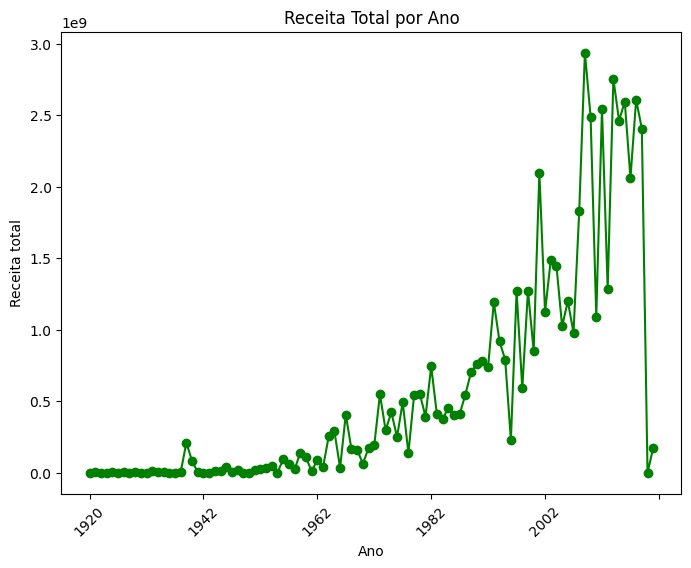

In [71]:
total_faturamento = df.groupby('Released_Year')['Gross'].sum()

plt.figure(figsize=(8, 6))
total_faturamento.plot(kind='line', marker='o', color='green')
plt.title('Receita Total por Ano')
plt.xlabel('Ano')
plt.ylabel('Receita total')
plt.xticks(rotation=45)
plt.show()

**Análise:** Nesse gráfico podemos observar que os filmes tiveram um crescimento no faturamento ao longo dos anos, indicando uma tendência positiva na indústria cinematográfica. Este aumento pode ser atribuído a vários fatores, como o aumento do orçamento de produção, a expansão do mercado global, avanços na tecnologia de cinema, e estratégias de marketing mais eficazes.

**Código:** 

- `df.groupby('Released_Year').['Gross'].sum()` Agrupa os dados pela coluna 'Released_Year', e para cada grupo (ano), soma os valores da coluna 'Gross' (receita bruta), resultando no faturamento total por ano;

- `total_faturamento.plot(kind='line', marker='o', color='green')` plota o faturamento total por ano como um gráfico de linha.

- `plt.xticks(rotation=45)` Rotaciona os rótulos do eixo x em 45 graus para que sejam mais fáceis de ler.

**Top 10 filmes mais bem avaliados:**

In [64]:
top_10_rating = df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'IMDB_Rating','Director']]
top_10_rating

,Series_Title,IMDB_Rating,Director
0,The Godfather,9.2,Francis Ford Coppola
1,The Dark Knight,9.0,Christopher Nolan
2,The Godfather: Part II,9.0,Francis Ford Coppola
3,12 Angry Men,9.0,Sidney Lumet
4,The Lord of the Rings: The Return of the King,8.9,Peter Jackson
5,Pulp Fiction,8.9,Quentin Tarantino
6,Schindler's List,8.9,Steven Spielberg
7,Inception,8.8,Christopher Nolan
8,Fight Club,8.8,David Fincher
9,The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson


**Média de avaliação por faixa etária:**

In [76]:
avaliacao_faixa_etaria = df.groupby('Certificate')['IMDB_Rating'].mean()
avaliacao_faixa_etaria

Certificate
16          8.100000
A           7.992347
Approved    7.945455
G           8.000000
GP          7.850000
PG          7.927027
PG-13       7.797674
Passed      8.020588
R           7.869863
TV-14       8.300000
TV-MA       8.100000
TV-PG       7.900000
U           7.976923
U/A         7.600000
UA          7.957143
Unrated     8.100000
Name: IMDB_Rating, dtype: float64

**Visualizando a matriz de correlação entre as variáveis numéricas:**

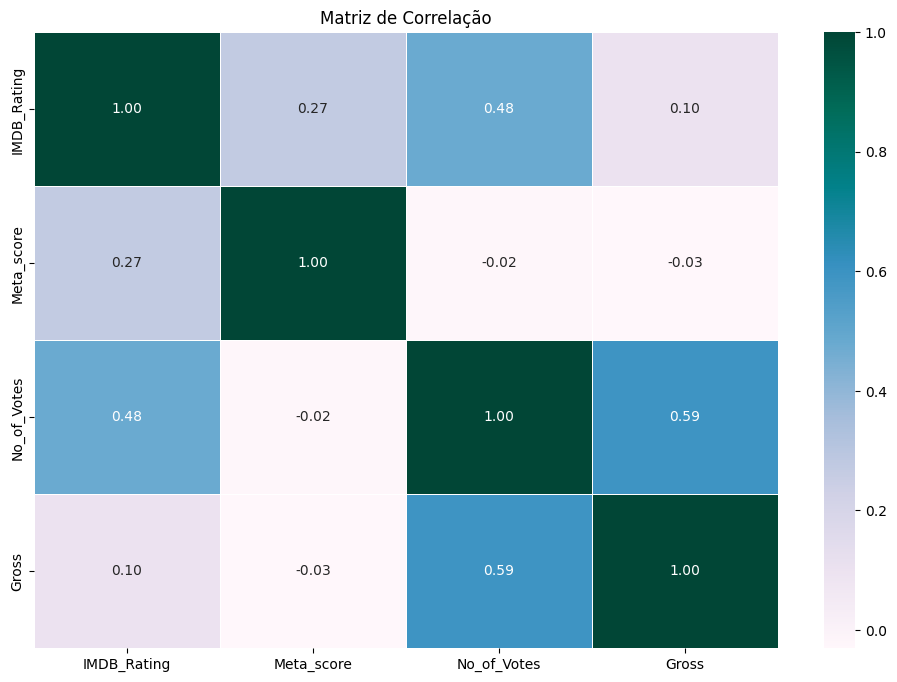

In [78]:
df_corr = df.select_dtypes(include=['float64', 'int64'])

df_corr = df_corr.drop(columns=['Unnamed: 0'])

corr = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='PuBuGn', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

**Análise:** `No_of_Votes` e `Gross` tem uma correlação positiva, o que significa que quanto maior o número de votos, mais pessoas assitiram logo maior será o faturamento.

**Código:** 

- `df_corr.corr()` calcula a matriz de correlação de Pearson para todas as colunas numéricas. A matriz de correlação mostra o grau de relação linear entre cada par de variáveis;
- `sns.heatmap(corr, annot=True, cmap='PuBuGn', fmt=".2f", linewidths=0.5)` cria um gráfico de calor (heatmap) usando a biblioteca Seaborn.

**Hipótese sobre Receita Bruta e Faixa Etária:**

- H0: A classificação etária (certificado) não afeta a receita bruta dos filmes.
- H1: A classificação etária (certificado) afeta a receita bruta dos filmes.

In [77]:
faixas_etarias = df['Certificate'].unique()

gross_data = [df[df['Certificate'] == faixa]['Gross'].dropna() for faixa in faixas_etarias]

gross_data = [group for group in gross_data if not group.empty]

anova_result = stats.f_oneway(*gross_data)

if anova_result.pvalue < 0.05:
    print("Rejeitamos a hipótese nula. A classificação etária afeta a receita bruta dos filmes.")
else:
    print("Não rejeitamos a hipótese nula. A classificação etária não afeta a receita bruta dos filmes.")

Rejeitamos a hipótese nula. A classificação etária afeta a receita bruta dos filmes.


**Análise:** Uma possível explicação para que a faixa etária afete a receita bruta dos filmes é que quanto menor a idade necessária para assistir um filme maior é o tamanho do público que pode assisti-lo, logo há mais chances de um maior faturamento.

**Código:**

- `df['Certificate'].unique():` Obtém os valores únicos na coluna 'Certificate', que representam as diferentes faixas etárias dos filmes;
- `[df[df['Certificate'] == faixa]['Gross'].dropna() for faixa in faixas_etarias]` para cada faixa etária, filtra os filmes que pertencem a essa faixa e extrai a coluna 'Gross' (receita bruta), removendo valores ausentes com .dropna();
- `[group for group in gross_data if not group.empty]:` remove qualquer grupo de receitas que esteja vazio, garantindo que apenas grupos com dados sejam considerados na análise.
- `stats.f_oneway(*gross_data)` realiza um teste ANOVA (Análise de Variância) de uma via para comparar as médias das receitas brutas entre as diferentes faixas etárias.

**2)** Responda também às seguintes perguntas:
   
**A) Qual filme você recomendaria para uma pessoa que você não conhece?**


In [182]:
indicacao = df.loc[df['IMDB_Rating'] == df['IMDB_Rating'].max(), 'Series_Title'].values[0]

print('Eu recomendaria o filme', indicacao)

Eu recomendaria o filme The Godfather


**Explicação:** Para essa pergunta apenas me baseei na nota do IMDB, se eu tivesse informações adicionais, como gênero favorito ou faixa etária, poderia oferecer uma recomendação mais adequada. No entanto, a nota do IMDB é um bom parâmetro para recomendação, pois representa uma média das avaliações de diversas pessoas ao redor do mundo, refletindo de forma geral a qualidade e popularidade do filme.

**Código:** Requisitei a nota mais alta da coluna IMDB_Rating e qual o nome do filme correspondente.

- `df.loc[]` é utilizado para acessar um grupo de linhas e colunas pelo rótulo;

- `df['IMDB_Rating'] == df['IMDB_Rating'].max()` é a condição que filtra as linhas onde a nota do IMDb é igual à nota máxima;
  
- `'Series_Title'` especifica que queremos apenas a coluna Series_Title das linhas filtradas;
  
- `.values[0]` retorna o primeiro valor desse filtro.

**B) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

In [7]:
df_ordenado = df.sort_values(by='Gross', ascending=False)

df_ordenado.head(3)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
476,477,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
58,59,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
622,623,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0


**Explicação:** Ao avaliar os três filmes que mais faturaram, podemos identificar alguns aspectos em comum que podem estar relacionados ao seu sucesso financeiro:
    
    1) Todos pertencem ao gênero de ação e aventura;
    2) A classificação etária é bem abrangente, o que permite que um grande número de pessoas, incluindo crianças, adolescentes e adultos, possam assistir. Isso amplia significativamente o público potencial;
    3) Os filmes contam com a participação de atores renomados e populares. A presença deles não só torna o filme mais atrativo, mas também atrai os fãs desses atores, gerando um interesse adicional.

Assim, podemos considerar que existem alguns fatores que são essenciais para que um filme tenha sucesso no faturamento, esses elementos combinados podem contribuir significativamente para o sucesso financeiro de um filme.

**Código:** Primeiro classifiquei a coluna Gross em ordem descendente para ver os filmes que mais faturam em sequência, depois selecionei os três primeiros filmes.

- `df.sort_values` ordena a base de dados por uma ou mais colunas;

- `(by='Gross', ascending=False)` a coluna escolhida foi *Gross* e sua ascendência está como False pois quero que seja do maior para o menor.

**C) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

Overview é uma coluna de resumo sobre o filme, a partir disso algumas observações podem ser feitas:

- A forma como a história é descrita pode dar uma ideia sobre o tipo de tom do filme, descrições com humor e situações engraçadas podem sugerir uma comédia; 

- Informações sobre os personagens e suas características podem ajudar a identificar o gênero. Um filme com protagonistas heroicos e aventuras épicas pode ser uma ação ou aventura, enquanto um filme focado em questões emocionais e pessoais pode ser um drama;

- O ambiente ou cenário, filmes ambientados em cenários futuristas ou fantasiosos podem ser de ficção científica ou fantasia;

- É importante notar que algumas descrições podem ser limitadas, com resumos mais genéricos o que pode dificultar na identificação de gênero. Existe também a possibilidade de um filme ter mais de um gênero, o que adiciona complexidade na determinação final.

É possível a inferência do gênero a partir dessa coluna, uma ideia é a criação de um dicionário com chaves (gênero) e valor (palavras que podem ser associadas ao gênero), um exemplo:

data = {

    'Action': ['fight', 'thrilling', 'action', 'intense'],
    'Drama': ['emotional', 'deep', 'heartwarming', 'drama'],
    'Horror': ['scary', 'suspense', 'jump scares', 'horror'],
    'Comedy': ['laugh', 'funny', 'comedy', 'humor'],
    'Documentary': ['documentary', 'exploring', 'nature', 'facts'] 
    
}

Isso pode funcionar, porém acredito que pode ser mais preciso se outra coluna for inserida, como a de título do filme (Series_Title).

**3)** Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Primeiro, é necessário identificar qual é o tipo da váriavel alvo (IMDB_Rating), que nesse caso é contínua, e por esse fato já se entende que a melhor forma para resolver é usar um modelo de regressão, as medidas de performance avaliam quão próximo o modelo chega dos valores reais. Agora, se fosse um problema que envolve prever categorias ou classes (como determinar o gênero de um filme), seria um problema de classificação.

Considerando que já houve uma limpeza dos dados, o segundo passo é escolher as possíveis váriaveis para ajudar na previsão, nesse caso escolhi as colunas 'Meta_score', 'No_of_Votes', 'Gross' e fiz uma transformação em Gross de uma váriavel categórica para numérica. 

Para prever a nota do IMDB escolhi o modelo Random Forest, que tem uma precisão alta e cria múltiplas árvores de decisão treinando cada uma com um subconjunto diferente dos dados (com substituição). Isso ajuda a reduzir a variância e melhora a generalização. Embora Random Forest seja bom para capturar interações entre variáveis, pode não capturar relações complexas ou não lineares tão bem quanto modelos mais sofisticados, como redes neurais profundas.

Após prever a nota do filme, utilizei a medida de performace MAE (Erro Absoluto Médio) para verificar a eficácia do modelo, escolhi essa medida pois além de ser fácil de interpretar também não é tão sensível a outliers quanto outras métricas.

**4)** Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


Qual seria a nota do IMDB?


**Treinando o modelo para prever a nota do IMDB:**

In [25]:
y = df['IMDB_Rating']
x = df[['Meta_score', 'No_of_Votes', 'Gross']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor()

modelo.fit(x_treino, y_treino)

RandomForestRegressor()

**Código:** Para treinar o modelo primeiro separei as váriaveis de y para selecionar a coluna 'IMDB_Rating' (que é a que quero prever) e x as colunas 'Meta_score', 'No_of_Votes', 'Gross' (são váriaveis independentes). Depois fiz uma divisão dos dados para o treino e o teste, sendo 70% para treino e 30% para teste.
Então, criei um modelo de regressão usando Random Forest e treinei o modelo, para então verificar e prever.

In [28]:
import pickle

with open("modelo.pkl", "wb") as arquivo:
    pickle.dump(modelo, arquivo)

Aqui estou transformando o modelo em um arquivo pkl.

**Prevendo a nota IMDB do filme sugerido:**

In [82]:
with open("modelo.pkl", "rb") as arquivo:
    modelo = pickle.load(arquivo)

data = {
        'Series_Title': 'The Shawshank Redemption', 
        'Released_Year': '1994', 
        'Certificate': 'A', 
        'Runtime': '142 min', 
        'Genre': 'Drama', 
        'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', 
        'Meta_score': 80.0, 
        'Director': 'Frank Darabont', 
        'Star1': 'Tim Robbins', 
        'Star2': 'Morgan Freeman', 
        'Star3': 'Bob Gunton', 
        'Star4': 'William Sadler', 
        'No_of_Votes': 2343110, 
        'Gross': '28,341,469'
       }

df_previsao = pd.DataFrame([data])

df_previsao['Gross'] = df_previsao['Gross'].str.replace(',', '').astype(float)

df_pre = df_previsao[['Meta_score', 'No_of_Votes', 'Gross']]

tabela = df_pre
previsao = modelo.predict(tabela)
display(tabela)
print('A nota de IMDB prevista do filme sugerido, The Shawshank Redemption, é de:', f"{previsao.item():.2f}")

,Meta_score,No_of_Votes,Gross
0,80.0,2343110,28341469.0


A nota de IMDB prevista do filme sugerido, The Shawshank Redemption, é de: 8.82


**Código:** Primeiro carreguei o modelo já treinado e então criei um dataframe (df_previsao) com as informações do enunciado, após selecionar as váriaveis para previsão (df_pre) usei o modelo para prever a avaliação do IMDB (`previsao = modelo.predict(tabela).item()`).

In [88]:
from sklearn.metrics import mean_absolute_error

y_pred = modelo.predict(x_teste)

mae = mean_absolute_error(y_teste, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")

Erro Absoluto Médio (MAE): 0.17


Para avaliar a eficácia do modelo escolhi a medida de performa MAE, e aqui podemos interpretar que um MAE de 0.17 indica que, em média, a diferença entre os valores previstos pelo modelo e os valores reais é de 0.17.

#### Qual deve ser o próximo filme a ser desenvolvido?

Baseando-se nas informações e análises realizadas ao longo deste projeto, algumas características podem ser consideradas para maximizar o potencial de sucesso do próximo filme:

- Analisando o desempenho de diferentes gêneros, ficou evidente que os filmes de ação e aventura tendem a gerar o maior faturamento. Portanto, investir em um filme dentro desses gêneros pode aumentar significativamente o potencial de sucesso financeiro;

- A presença de um diretor renomado e atores famosos é crucial para atrair mais público e gerar maior visibilidade. A experiência e o histórico de sucesso desses profissionais podem contribuir para a criação de um filme de alta qualidade e atraente para o público;

- Optar por uma classificação etária que permita a visualização por um público mais amplo é estratégico. Isso pode ajudar a alcançar uma audiência maior e diversificada, aumentando as chances de sucesso do filme.
  
Essas recomendações são baseadas nas análises de dados sobre gêneros, desempenho financeiro, e impacto de fatores como direção e elenco. Seguir essas diretrizes pode ajudar a aumentar as chances de sucesso do próximo projeto cinematográfico, maximizando o faturamento e a aceitação pelo público.